In [39]:
#data 불러오기
from matplotlib import pyplot as plt
import pandas as pd

kodex200_path=r'C:\Users\aviat\OneDrive\바탕 화면\엑셀 데이터\주식 책 데이터\kodex200.csv'
treasury20_path=r'C:\Users\aviat\OneDrive\바탕 화면\엑셀 데이터\주식 책 데이터\treasury20year.xlsx'
treasury03_path=r'C:\Users\aviat\OneDrive\바탕 화면\엑셀 데이터\주식 책 데이터\korea 3 year treasury.csv'
kodex200=pd.read_csv(kodex200_path,engine='python')
treasury20=pd.read_excel(treasury20_path)
treasury03=pd.read_csv(treasury03_path,engine='python')


In [40]:
# 데이터 날짜로 이너조인
kodex200.index=kodex200.DATE
treasury20.index=treasury20.DATE
treasury03.index=treasury03.Date
raw_data1=pd.merge(kodex200,treasury20,how='inner',left_index=True,right_index=True) # inner join with merge
raw_data=pd.merge(raw_data1,treasury03,how='inner',left_index=True,right_index=True)
raw_data=raw_data.rename(columns={'Close_x':'kodex200','Close_y':'treasury20','Close':'treasury03'}) # rename with dic
raw_data=raw_data[['kodex200','treasury20','treasury03']]


## 모멘텀 계산하기

In [41]:
def momentum(x):
    temp=(x[-1]-x[0])/x[0]
    return temp
kodex200_m_20=raw_data['kodex200'].rolling(window=20).apply(momentum,raw=True)
raw_data['kodex200_momentum_20']=kodex200_m_20

In [42]:
import numpy as np
temp=raw_data['kodex200_momentum_20'].apply(np.isnan)
temp=~temp
raw_data=raw_data[temp]

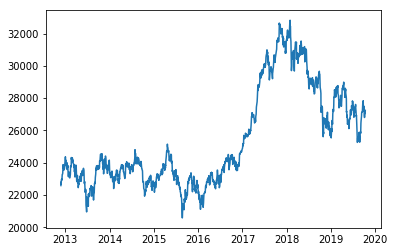

In [133]:
plt.plot(raw_data['kodex200'])

In [187]:
len(raw_data)

1687

In [203]:

rebal_period=60
temp=int(len(raw_data)/rebal_period)-2
initial_money=6000000
initial_price=raw_data['kodex200'][0]
initial_momentum=raw_data['kodex200_momentum_20'][0]

momentum=[]
cash_portpolio=[]
stock_portpolio=[]
stock_count=[]
close_price=[] # 직전 투자주기의 종가 Table
    
for i in range(0,temp):
    table=raw_data.iloc[i*rebal_period:i*rebal_period+rebal_period]
   
    #-------------------초기값(첫주) 설정 ------------------------------------------------------
    if i==0 :
        if initial_momentum>0:
            # 초기값
            stock_cnt=int(initial_money/initial_price)
            stock_port=initial_price*stock_cnt
            cash_port=initial_money-stock_port
            
            for j in range(0,rebal_period):
                stock_count.append(stock_cnt)
                cash_portpolio.append(cash_port)
                stock_portpolio.append(table['kodex200'][j]*stock_cnt)
                momentum.append(table['kodex200_momentum_20'][j])
                close_price.append(table['kodex200'][j])
#             print(stock_count)
#             print(table)
        else:
            for j in range(0,rebal_period):
                stock_portpolio.append(0)
                cash_portpolio.append(initial_money)
                stock_count.append(0)
                close_price.append(table['kodex200'][j])
#             print(stock_count)
#             print(table)
    #-------------------메인 설정 --------------------------------------------------------------------        
    else:
        if momentum[-1]<=0 and stock_portpolio[-1]!=0:# 모멘텀이 - 이고 주식이 있는경우
            for j in range(0,rebal_period):
                stock_count.append(0)
                cash_portpolio.append(stock_portpolio[-1]+cash_portpolio[-1])
                stock_portpolio.append(0)
                momentum.append(table['kodex200_momentum_20'][j])
                close_price.append(table['kodex200'][j])
#             print(stock_count)
#             print(table)
        elif momentum[-1]<=0 and stock_portpolio[-1]==0: # 모멘텀이 - 이고 주식이 없는 경우
            for j in range(0,rebal_period):
                stock_count.append(0)
                cash_portpolio.append(cash_portpolio[-1])
                stock_portpolio.append(0)
                momentum.append(table['kodex200_momentum_20'][j])
                close_price.append(table['kodex200'][j])
#             print(stock_count)
#             print(table)
        
        elif momentum[-1]>0 and stock_portpolio[-1]!=0: # 모멘텀이 + 이고 주식이 있는 경우
            for j in range(0,rebal_period):
                stock_count.append(stock_count[-1])
                cash_portpolio.append(cash_portpolio[-1])
                stock_portpolio.append(table['kodex200'][j]*stock_count[-1])
                momentum.append(table['kodex200_momentum_20'][j])   
                close_price.append(table['kodex200'][j])
#             print(stock_count)
#             print(table)
        else:                                            # 모멘텀이 + 이고 주식이 없는 경우
            stock_cnt=int(cash_portpolio[-1]/close_price[-1])
            cash_port=cash_portpolio[-1]-close_price[-1]*stock_cnt
            for j in range(0,rebal_period):
                stock_count.append(stock_cnt)
                cash_portpolio.append(cash_port)
                stock_portpolio.append(table['kodex200'][j]*stock_cnt)
                momentum.append(table['kodex200_momentum_20'][j])
                close_price.append(table['kodex200'][j])
#             print(stock_count)
#             print(table)
        
        
        
#     if table['kodex200_momentum_20'][0]>0:
#         kodex_price=table['kodex200'][0]
#         kodex_cnt=int(invest_money/kodex_price)
#         kodex_pp=kodex_price*kodex_cnt
#         cash_pp=[invest_money-kodex_pp]*rebal_period
#         cash.append()
        

1682

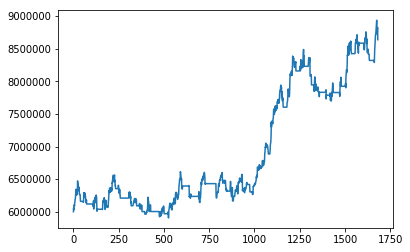

In [217]:
pp=pd.DataFrame({'stock':stock_portpolio,'cash':cash_portpolio})
pp['total']=pp['stock']+pp['cash']
plt.plot(pp.total)
len(pp)

In [218]:
len(raw_data)

1687

In [212]:
raw_data['kodex_chage']=raw_data.kodex200.pct_change()
raw_data['hold']=raw_data.kodex200*265.7

In [227]:
raw_data=raw_data[0:1682]

In [225]:
len(cash_portpolio)


1682

In [232]:
raw_data['stock']=stock_portpolio

C:\Users\aviat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
raw_data['total']=raw_data.cash+raw_data.stock

C:\Users\aviat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


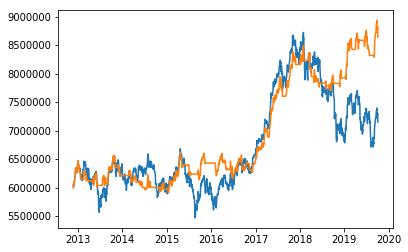

In [237]:
plt.plot(raw_data[['hold','total']])

In [226]:
len(raw_data)

1687

In [211]:
6000000/22581

265.71011026969575

[5983965,
 6042795,
 6009140,
 6072740,
 6081485,
 6089965,
 6072740,
 6114875,
 6129185,
 6164430,
 6174235,
 6193845,
 6238895,
 6306205,
 6327935,
 6265925,
 6295870,
 6294545,
 6238895,
 6263275]

Object `append` not found.


In [58]:
int(2/3)

0

In [80]:
range(0,1)

range(0, 1)

In [34]:
# initial_money=6000000
# kodex_price = raw_data['kodex200']
# stock_count=int(initial_money/kodex_price[0:1])
# cash_amount=initial_money-kodex_price[0:1]*stock_count
# cash_amount=cash_amount[0]
# raw_data['주식포트폴리오']=kodex_price*stock_count
# raw_data['현금포트폴리오']=[cash_amount]*len(raw_data)
# raw_data['종합포트폴리오']=raw_data['주식포트폴리오']+raw_data['현금포트폴리오']


C:\Users\aviat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aviat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\aviat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [27]:
cash_amount?

In [20]:
raw_data

,kodex200,treasury20,treasury03,kodex200_momentum_20,주식포트폴리오
2012-11-26,22581,91780,92654,0.010471,5983965
2012-11-27,22803,91356,92609,0.011578,6042795
2012-11-28,22676,91725,92650,0.016542,6009140
2012-11-29,22916,91706,92683,0.015240,6072740
2012-11-30,22949,91716,92683,0.021954,6081485
2012-12-03,22981,91565,92727,0.012334,6089965
2012-12-04,22916,91642,92679,0.004075,6072740
2012-12-05,23075,90960,92737,0.027153,6114875
2012-12-06,23129,90952,92686,0.035642,6129185
2012-12-07,23262,91274,92766,0.042251,6164430


In [9]:
strategy_price = raw_data['kodex200']

In [3]:
#  [코드 5.12] 백테스트 함수 버젼1 (Ch5. 백테스트.ipynb)


def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money):

    code_list = []
    for code in strategy_df.index:
        code_list.append(code.replace('A',''))

    strategy_price = price_df[code_list][start_date:end_date]

    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money / len(strategy_df)
    for code in strategy_price.columns:
        temp = int( each_money / strategy_price[code][0] )
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

    cash_amount = initial_money - stock_amount

    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount] * len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1
    
    
    return backtest_df

In [10]:
# 시작일 종가가 없는 종목 빼기 함수
def select_code_by_price(price_df, data_df, start_date):
    new_code_list = []
    for code in price_df[start_date].iloc[0].dropna().index:
        new_code_list.append('A' + code)
        
    selected_df =  data_df.loc[new_code_list]
    return selected_df

C:\Users\aviat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


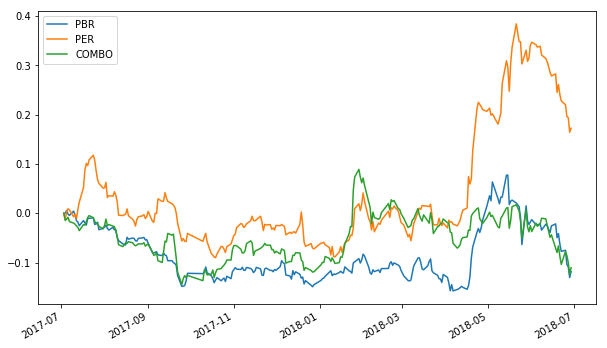

In [17]:
import matplotlib.pyplot as plt

strategy_date = '2016/12'
start_date = '2017-7'
end_date = '2018-6'
initial_money = 100000000

# 전략별 종목 리스트 가져오기
low_pbr = python_quant.get_value_rank(select_code_by_price(price_df,invest_df,start_date), 'PBR', strategy_date, 20)
low_per = python_quant.get_value_rank(select_code_by_price(price_df,invest_df,start_date), 'PER', strategy_date, 20)
combo_st=python_quant.make_value_combo(['PER','PBR','PCR','PSR'],select_code_by_price(price_df,invest_df,start_date),strategy_date,20)

# 전략별 백테스팅
pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)
combo_backtest= backtest_beta(price_df, combo_st, start_date, end_date, initial_money)

#그림그리기
plt.figure(figsize=(10,6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
combo_backtest['총변화율'].plot(label='COMBO')
plt.legend()